In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import copy

import csv

class Struct:
    pass

class MyProblem:
    def __init__(self, n):
        self.n = n

    def fobj(self, x, probdata):
    
        '''
            a1 a2 ... an
        x = [t7 t3 ... t9]
        '''
        
        fitness = 0.0
        for i in np.arange(0,probdata.n,1):
            fitness += probdata.c[i,x.solution[i]]
        
        x.fitness = fitness
        print(fitness)
        return x


    def sol_inicial(self, probdata,apply_constructive_heuristic):
    
        '''  
        Modelou-se uma solução x como a sequência de tarefas atribuídas, respectivamente, aos agentes a1, a2, ... ai, ..., an
        
            a1 a2 ... an
        x = [t7 t3 ... t9]
        '''
        
        if apply_constructive_heuristic == False:        
            # Constrói solução inicial aleatoriamente
            x = Struct()
            x.solution = list(np.random.permutation(probdata.n))
        
        else:
            # Constrói solução inicial usando uma heurística construtiva
            x = Struct()
            x.solution = []
            job = np.argsort(probdata.c.var(axis=0))    # tarefas ordenadas de acordo com a variância dos custos
            for tarefa in job[::-1]:        
                agent = np.argmin(probdata.c[:,tarefa]) # atribui as tarefas em ordem decrescente de variância ao agente de menor custo
                x.solution.insert(agent,tarefa)
            
        return x

    def probdef(self):

        # extrai os dados do CSV e salva na matriz
        equip_db = np.array()

        with open('eggs.csv', newline='') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
            current_equip = np.array()
            for row in spamreader:
                current_equip = np.append(row)
                print(', '.join(row))

            equip_db = np.append(current_equip)

        print(equip_db)
    
        # n: número de tarefas/agentes considerados
            
        '''
        Matriz de custo: c = [  t1 t2 ... tj ... tn
                            a1
                            a2
                            ...
                            ai
                            ...
                            an                    ]
        ''' 
        
        np.random.seed(13)    
        c = np.random.randint(1,100,size=(self.n,self.n)) # considera custos inteiros aleatórios no conjunto {1, 2, ..., 99}
        np.random.seed()
        
        probdata = Struct()
        probdata.n = self.n
        probdata.c = c

        print(n)
            
        return probdata

In [24]:
class MyRVNS:
    def shake(self, x, k, probdata):
        
        y = copy.deepcopy(x)
        r = np.random.permutation(probdata.n)
        
        if k == 1:             # exchange two random positions
            y.solution[r[0]] = x.solution[r[1]]
            y.solution[r[1]] = x.solution[r[0]]        
        elif k == 2:           # exchange three random positions
            y.solution[r[0]] = x.solution[r[1]]
            y.solution[r[1]] = x.solution[r[2]]
            y.solution[r[2]] = x.solution[r[0]]
        elif k == 3:           # shift positions     
            z = y.solution.pop(r[0])
            y.solution.insert(r[1],z)
        
        return y

    def neighborhoodChange(self, x, y, k):
        
        if y.fitness < x.fitness:
            x = copy.deepcopy(y)
            k = 1
        else:
            k += 1
            
        return x, k

50
2810.0
2778.0
2814.0
2739.0
2661.0
2584.0
2522.0
2538.0
2511.0
2507.0
2547.0
2486.0
2585.0
2378.0
2375.0
2410.0
2379.0
2366.0
2340.0
2296.0
2315.0
2255.0
2332.0
2136.0
2203.0
2247.0
2091.0
2181.0
2146.0
2288.0
2041.0
2108.0
2184.0
2223.0
2111.0
2121.0
2100.0
2081.0
2016.0
2115.0
1939.0
1975.0
2082.0
1928.0
2019.0
1939.0
2307.0
2006.0
1828.0
1813.0
1871.0
1849.0
2140.0
1753.0
1832.0
1739.0
1652.0
1625.0
1663.0
1691.0
2184.0
1654.0
1611.0
1658.0
1628.0
1683.0
1610.0
1741.0
1794.0
1772.0
1683.0
1623.0
2136.0
1616.0
1598.0
1719.0
1700.0
2403.0
1655.0
1669.0
2124.0
1570.0
1645.0
1652.0
2276.0
1534.0
1523.0
1616.0
1589.0
1685.0
1555.0
1551.0
2087.0
1578.0
1560.0
1588.0
1564.0
1589.0
1623.0
1484.0
1585.0
1511.0
2141.0
1490.0
1447.0
1456.0
1527.0
2027.0
1561.0
1562.0
2486.0
1570.0
1589.0
1681.0
1357.0
1361.0
1350.0
1408.0
1368.0
1503.0
1423.0
1458.0
1871.0
1442.0
1385.0
1378.0
1445.0
1409.0
1809.0
1356.0
1538.0
2221.0
1467.0
1350.0
1646.0
1384.0
1542.0
1364.0
1329.0
1362.0
1364.0
1550.0
141

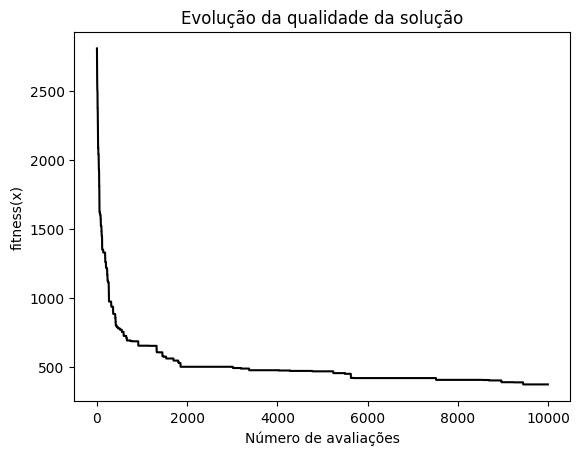

In [ ]:
# numero de agentes / tarefas
n = 50

myProblem = MyProblem(n)
myRVNS = MyRVNS()

# Contador do número de soluções candidatas avaliadas
num_sol_avaliadas = 0

# Máximo número de soluções candidatas avaliadas
max_num_sol_avaliadas = 10000

# Número de estruturas de vizinhanças definidas
kmax = 3

# Faz a leitura dos dados da instância do problema
probdata = myProblem.probdef()

# Gera solução inicial
x = myProblem.sol_inicial(probdata,apply_constructive_heuristic=False)

# Avalia solução inicial
x = myProblem.fobj(x,probdata)
num_sol_avaliadas += 1

# Armazena dados para plot
historico = Struct()
historico.sol = []
historico.fit = []
historico.sol.append(x.solution)
historico.fit.append(x.fitness)


# Ciclo iterativo do método
while num_sol_avaliadas < max_num_sol_avaliadas:
    
    k = 1
    while k <= kmax:
        
        # Gera uma solução candidata na k-ésima vizinhança de x        
        y = myRVNS.shake(x,k,probdata)
        y = myProblem.fobj(y,probdata)
        num_sol_avaliadas += 1
        
        # Atualiza solução corrente e estrutura de vizinhança (se necessário)
        x,k = myRVNS.neighborhoodChange(x,y,k)
        
        # Armazena dados para plot
        historico.sol.append(x.solution)
        historico.fit.append(x.fitness)


print('\n--- SOLUÇÃO INICIAL CONSTRUÍDA ---\n')
print('Sequência de tarefas atribuídas aos agentes:\n')
print('x = {}\n'.format(historico.sol[0]))
print('fitness(x) = {:.1f}\n'.format(historico.fit[0]))

print('\n--- MELHOR SOLUÇÃO ENCONTRADA ---\n')
print('Sequência de tarefas atribuídas aos agentes:\n')
print('x = {}\n'.format(x.solution))
print('fitness(x) = {:.1f}\n'.format(x.fitness))

plt.figure()
s = len(historico.fit)
plt.plot(np.linspace(0,s-1,s),historico.fit,'k-')
plt.title('Evolução da qualidade da solução');
plt.xlabel('Número de avaliações');
plt.ylabel('fitness(x)');
plt.show()